In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import librosa as lb
import os

# Handeling Class Imbalance

In [13]:
diagnosis=pd.read_csv('data/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [14]:
def extractId(filename):
    return filename.split('_')[0]

In [15]:
path='data/processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
for f in os.listdir(path):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

C:\Users\ValentinPoigt\AppData\Local\Temp\ipykernel_4856\412119390.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  files_df.iloc[i]['pid']=extractId(f)
C:\Users\ValentinPoigt\AppData\Local\Temp\ipykernel_4856\412119390.py:8: FutureWarnin

,pid,filename
0,102,102_1b1_Ar_sc_Meditron_0.wav
1,102,102_1b1_Ar_sc_Meditron_1.wav
2,102,102_1b1_Ar_sc_Meditron_10.wav
3,102,102_1b1_Ar_sc_Meditron_11.wav
4,102,102_1b1_Ar_sc_Meditron_12.wav


In [16]:
files_df.pid=files_df.pid.astype('int64')

In [17]:
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,102,102_1b1_Ar_sc_Meditron_0.wav,Healthy
1,102,102_1b1_Ar_sc_Meditron_1.wav,Healthy
2,102,102_1b1_Ar_sc_Meditron_10.wav,Healthy
3,102,102_1b1_Ar_sc_Meditron_11.wav,Healthy
4,102,102_1b1_Ar_sc_Meditron_12.wav,Healthy


In [18]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [19]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

disease
COPD              0.414343
Pneumonia         0.252324
Bronchiolitis     0.136786
URTI              0.054449
Bronchiectasis    0.051793
Healthy           0.051793
LRTI              0.031873
Asthma            0.006640
Name: count, dtype: float64

In [20]:
Xval.disease.value_counts()/Xval.shape[0]

disease
COPD              0.416667
Pneumonia         0.253968
Bronchiolitis     0.138889
Healthy           0.051587
URTI              0.051587
Bronchiectasis    0.051587
LRTI              0.031746
Asthma            0.003968
Name: count, dtype: float64

# Visualizing MFCCS

[Text(0.5, 1.0, 'MFCC')]

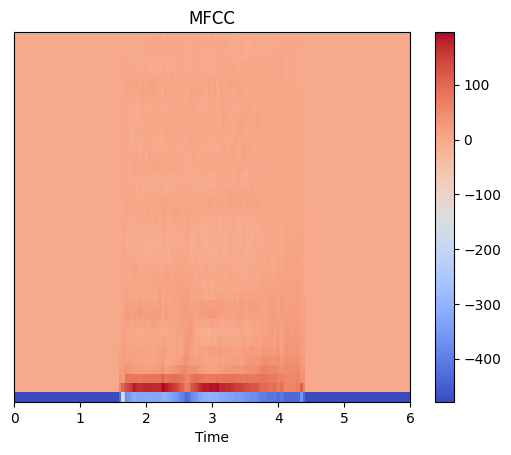

In [21]:
path='data/processed_audio_files/'

import librosa.display
file=path + Xtrain.iloc[193].filename 
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [22]:
Xtrain.to_csv('data/train.csv')
Xval.to_csv('data/val.csv')